# NatureBiotech Cover
### https://www.nature.com/nbt/volumes/38/issues/12

In [1]:
# update to the latest version, if not done yet.
#!pip install scvelo --upgrade --quiet

In [2]:
import scvelo as scv

In [3]:
scv.settings.verbosity = 0  # only show errors, no hints/information
scv.set_figure_params('scvelo')  # for beautified visualization
scv.logging.print_version()

Running scvelo 0.2.3.dev35+g95d90de.d20201204 (python 3.8.0) on 2020-12-04 15:17.


In [4]:
adata = scv.datasets.pancreas()
scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(adata)

In [5]:
scv.tl.recover_dynamics(adata)

In [6]:
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)
scv.tl.latent_time(adata)

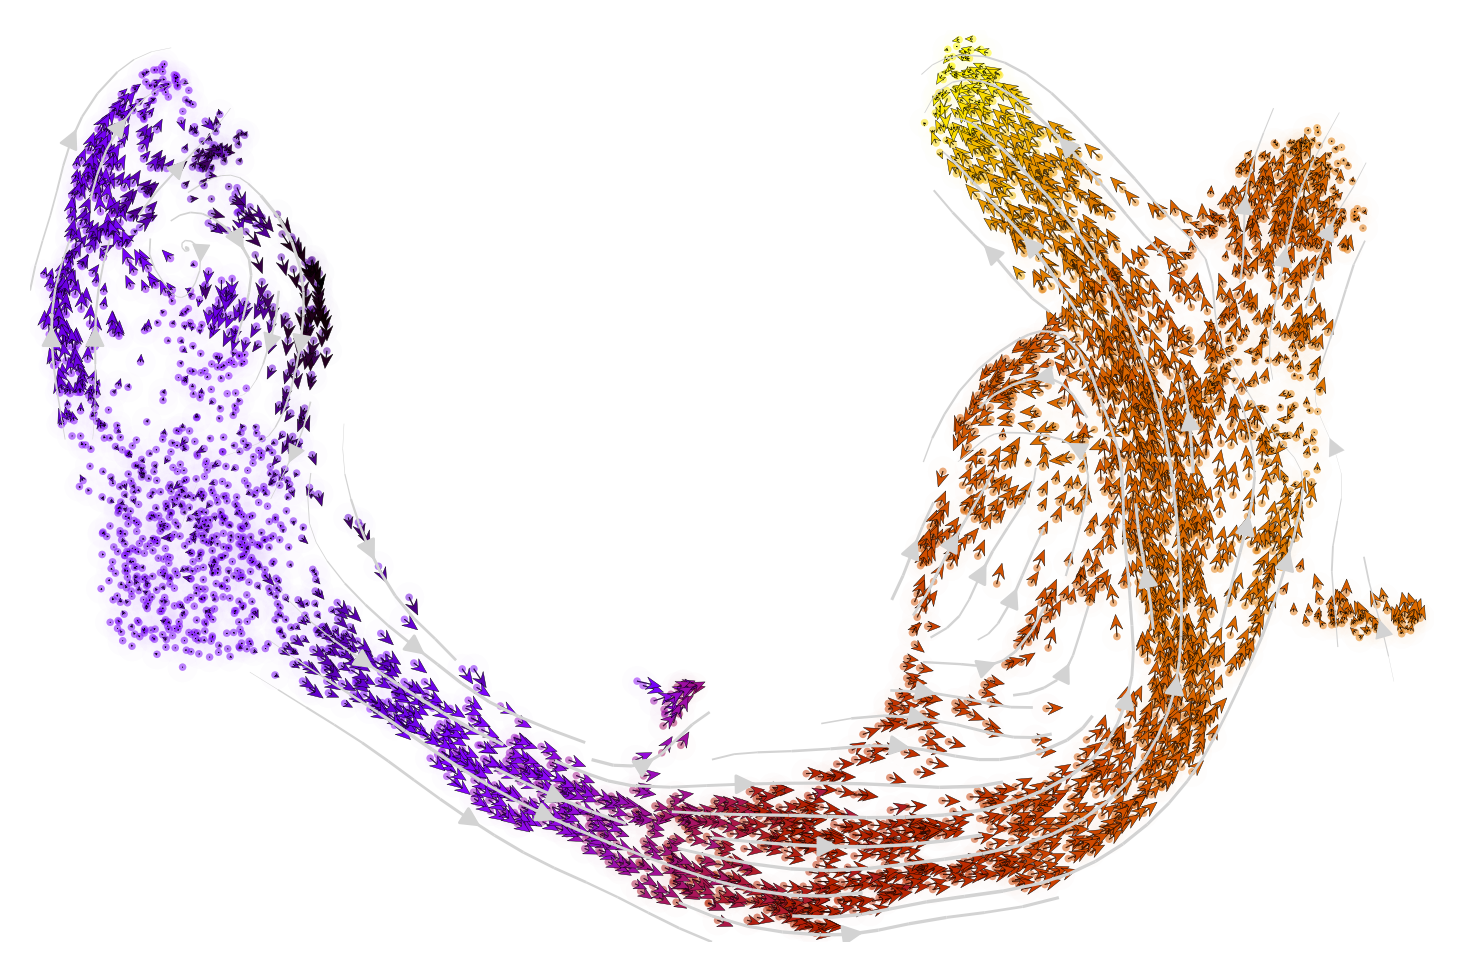

In [7]:
# black background
kwargs = dict(color='latent_time', color_map='gnuplot', title='', 
              vmin=-.1, colorbar=False, show=False, dpi=150)

ax = scv.pl.velocity_embedding(adata, arrow_length=4.3, arrow_size=1.8, alpha=.5, **kwargs)

ax = scv.pl.velocity_embedding_stream(adata, alpha=.01, arrow_color='lightgrey', ax=ax,
                                      smooth=.7, min_mass=3.5, density=.6, linewidth=.5, **kwargs)

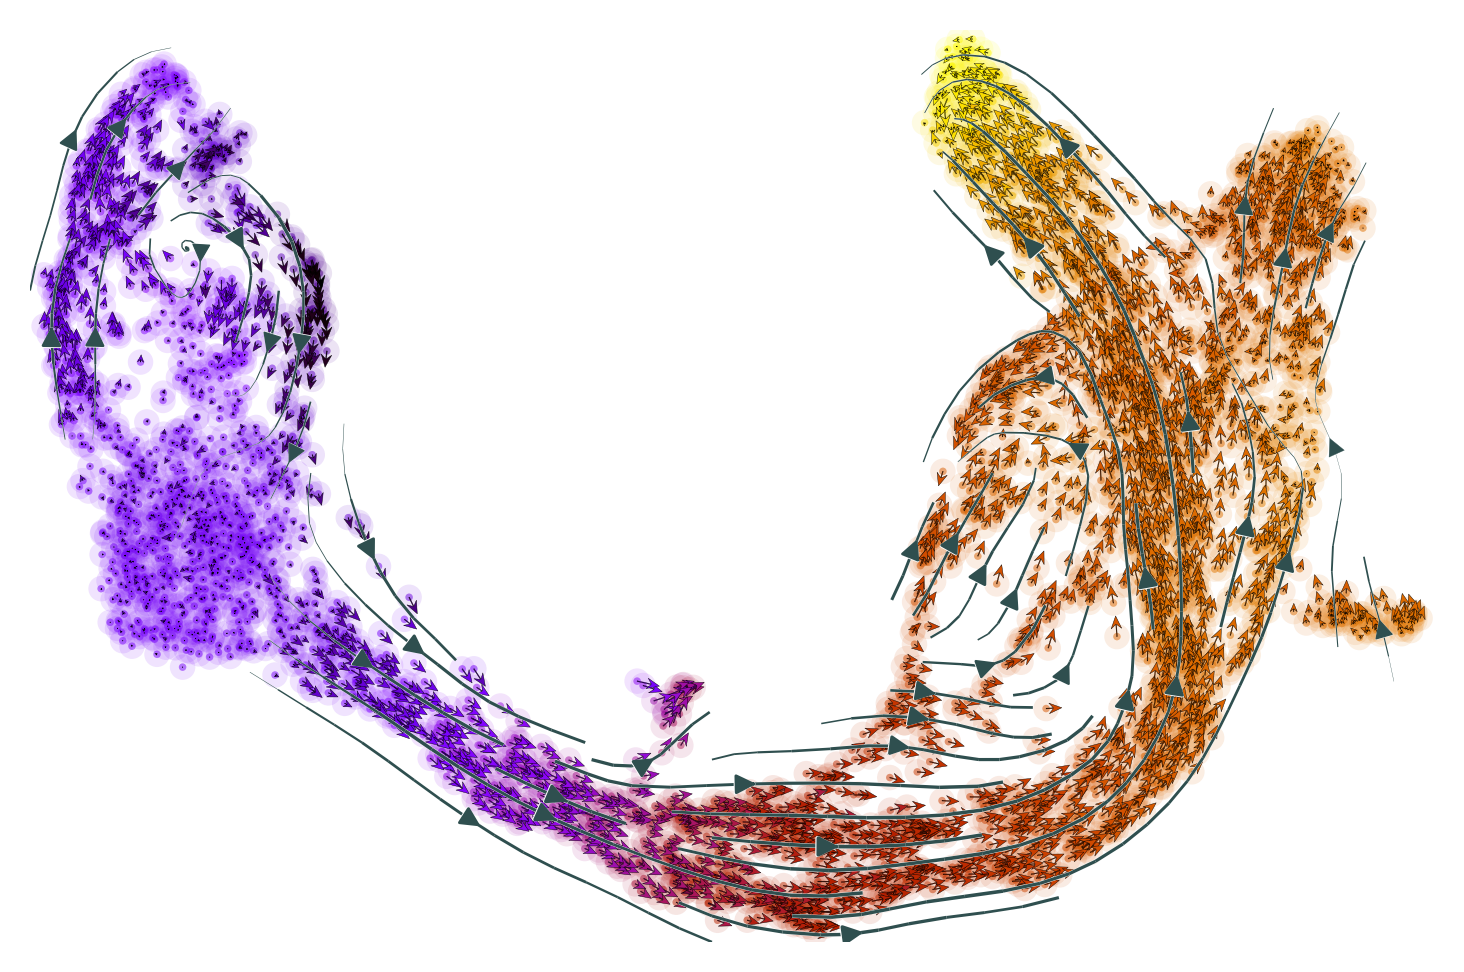

In [8]:
# white background

kwargs = dict(color='latent_time', color_map='gnuplot', title='', vmin=-.1, colorbar=False, show=False)

ax = scv.pl.velocity_embedding(adata, arrow_length=4, arrow_size=1.5, alpha=.5, dpi=150, **kwargs)

ax = scv.pl.velocity_embedding_stream(adata, size=150, alpha=.01, arrow_color='white', ax=ax,
                                      smooth=.7, min_mass=3.5, density=.6, linewidth=.6, **kwargs)

ax = scv.pl.velocity_embedding_stream(adata, size=150, alpha=.1, arrow_color='darkslategrey', ax=ax,
                                      smooth=.7, min_mass=3.5, density=.6, linewidth=.5, **kwargs)
